In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [146]:
df = pd.read_csv('day.csv')

In [147]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [148]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [150]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [152]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [153]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [154]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [155]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [156]:
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [157]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   year        730 non-null    int64  
 4   month       730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


## Data Visualization 

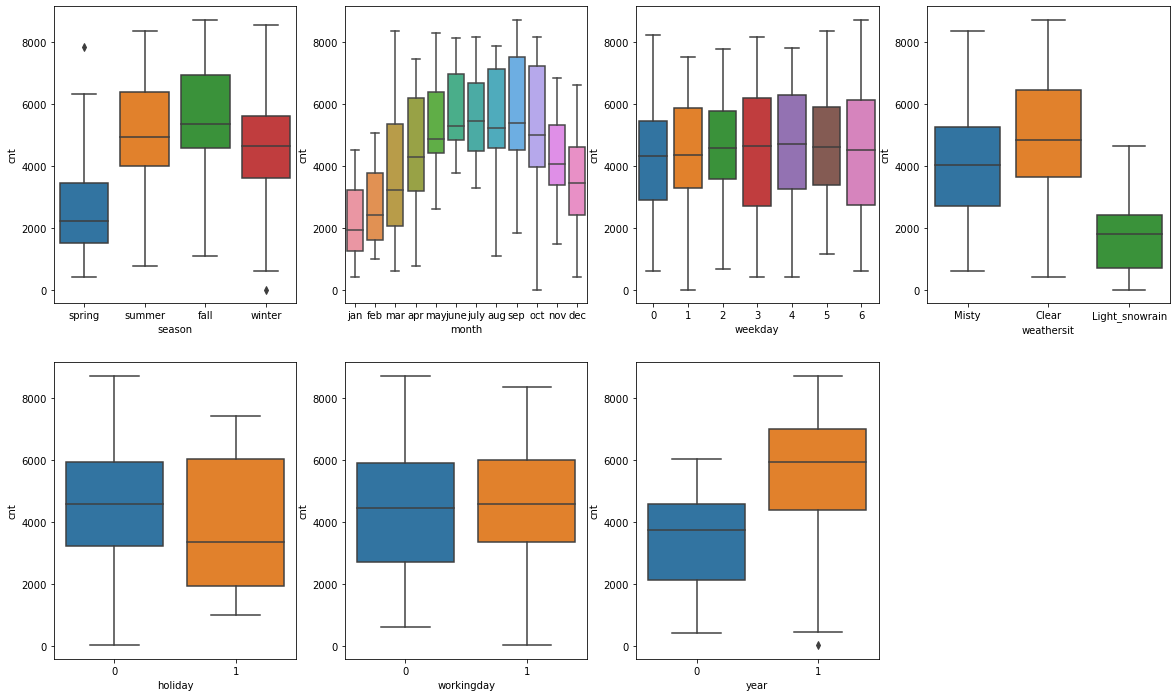

In [159]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [160]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

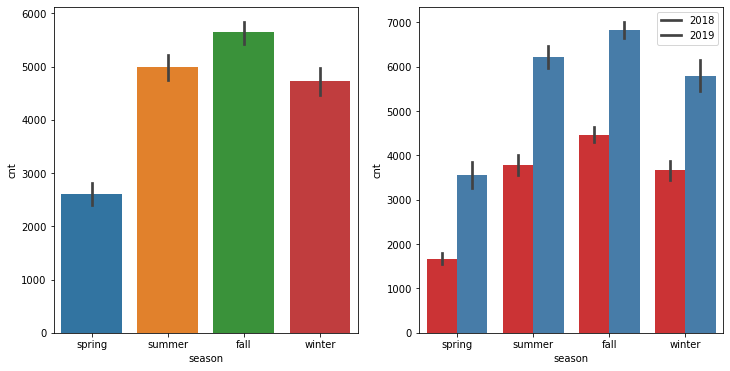

In [161]:
plot_cat_columns('season')

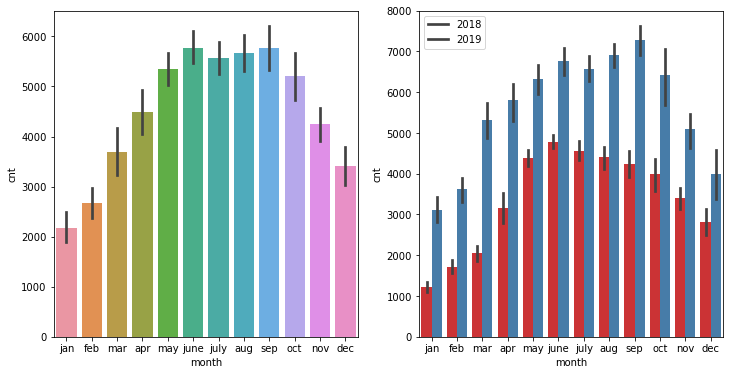

In [162]:
plot_cat_columns('month')

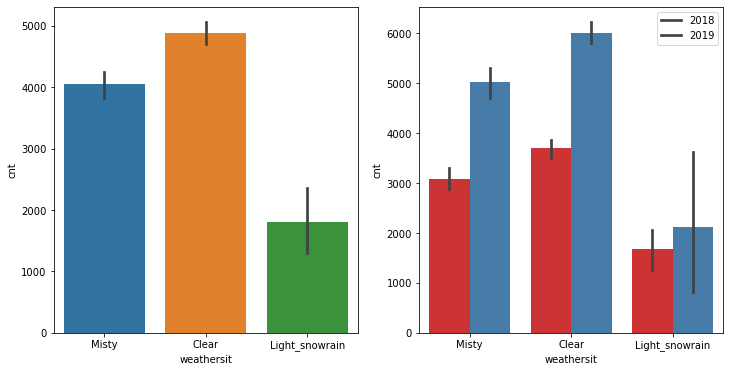

In [163]:
plot_cat_columns('weathersit')

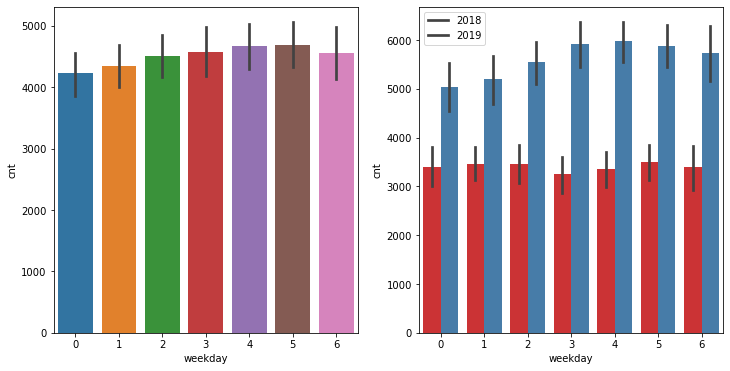

In [164]:
plot_cat_columns('weekday')

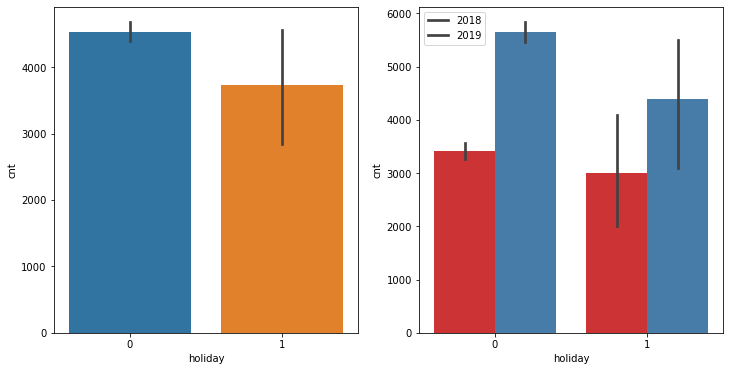

In [165]:
plot_cat_columns('holiday')

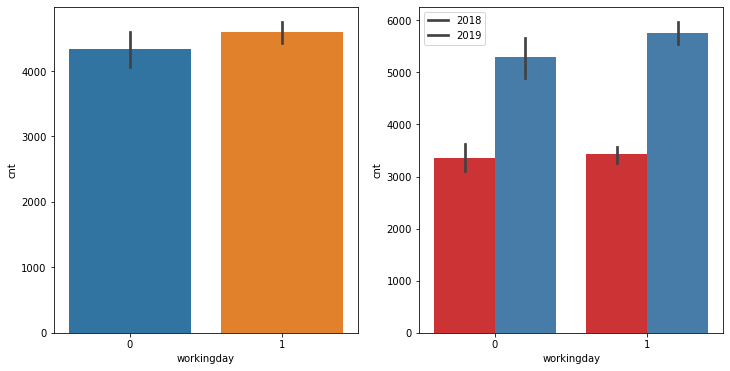

In [166]:
plot_cat_columns('workingday')

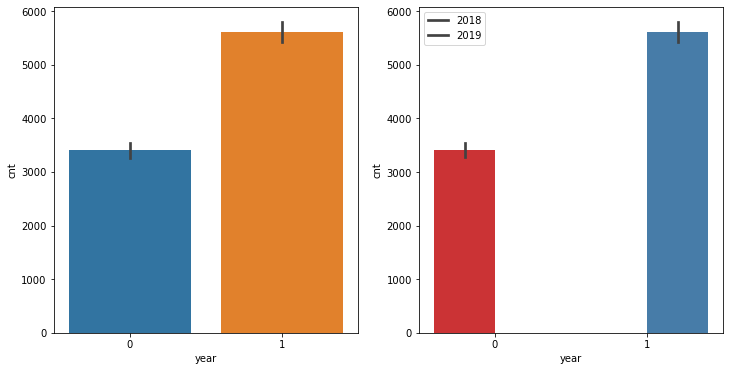

In [167]:
plot_cat_columns('year')

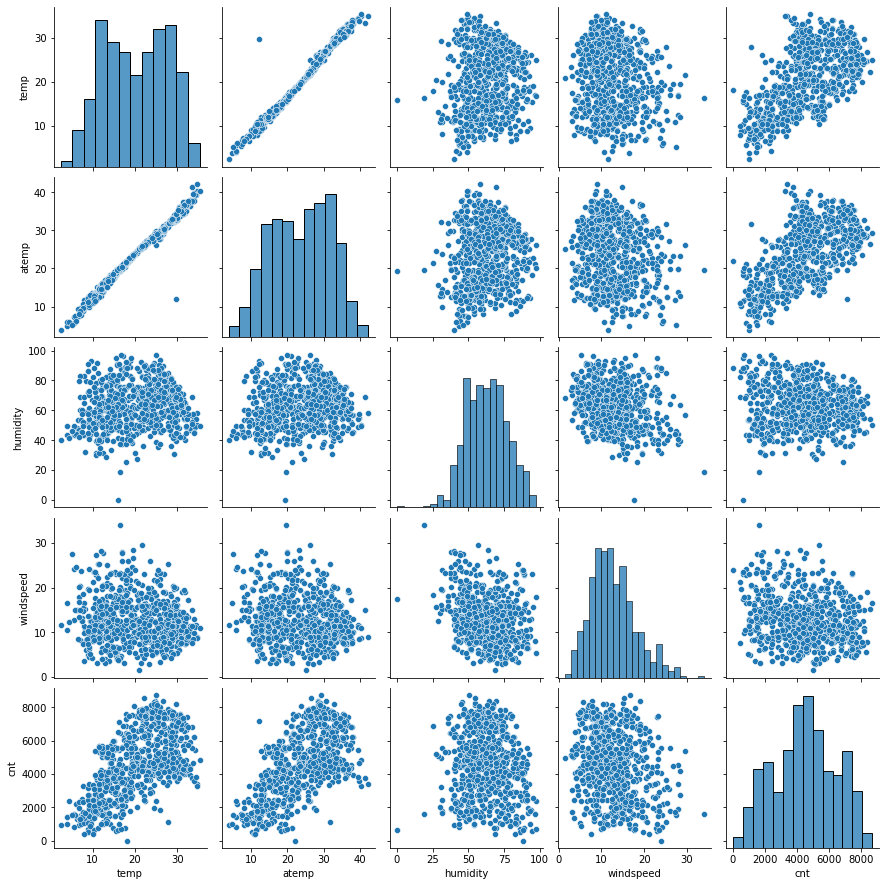

In [168]:
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

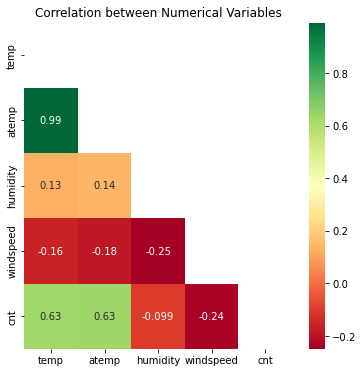

In [169]:
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

## Preparing Data

In [170]:
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [171]:
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [172]:
df_new.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,1,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
0,1,01-01-2018,spring,0,jan,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,2,02-01-2018,spring,0,jan,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,3,03-01-2018,spring,0,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,spring,0,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [173]:
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [174]:
df_new.head()

,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,1,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## Creating Training and Testing Sets

In [175]:
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [176]:
df_train.shape

(510, 34)

In [177]:
df_test.shape

(220, 34)

In [178]:
scaler = MinMaxScaler()

In [179]:
df_train.head()

,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,1,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
576,577,31-07-2019,1,0,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
426,427,03-03-2019,1,0,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
728,729,30-12-2019,1,0,0,10.489153,11.5850,48.3333,23.500518,364,1432,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,483,28-04-2019,1,0,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
111,112,22-04-2018,0,0,1,13.803347,16.0977,72.9583,14.707907,177,1506,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [180]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [181]:
df_train.head()

,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,1,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
576,577,31-07-2019,1,0,1,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
426,427,03-03-2019,1,0,0,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
728,729,30-12-2019,1,0,0,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,483,28-04-2019,1,0,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
111,112,22-04-2018,0,0,1,0.345824,0.318819,0.751824,0.380981,177,1506,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [182]:
df_train.describe()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,1,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,837.633333,3647.703922,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.345098,0.243137,0.247059,0.247059
std,209.596164,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,675.936359,1578.410906,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475867,0.429398,0.431725,0.431725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,700.000000,3657.000000,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,552.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


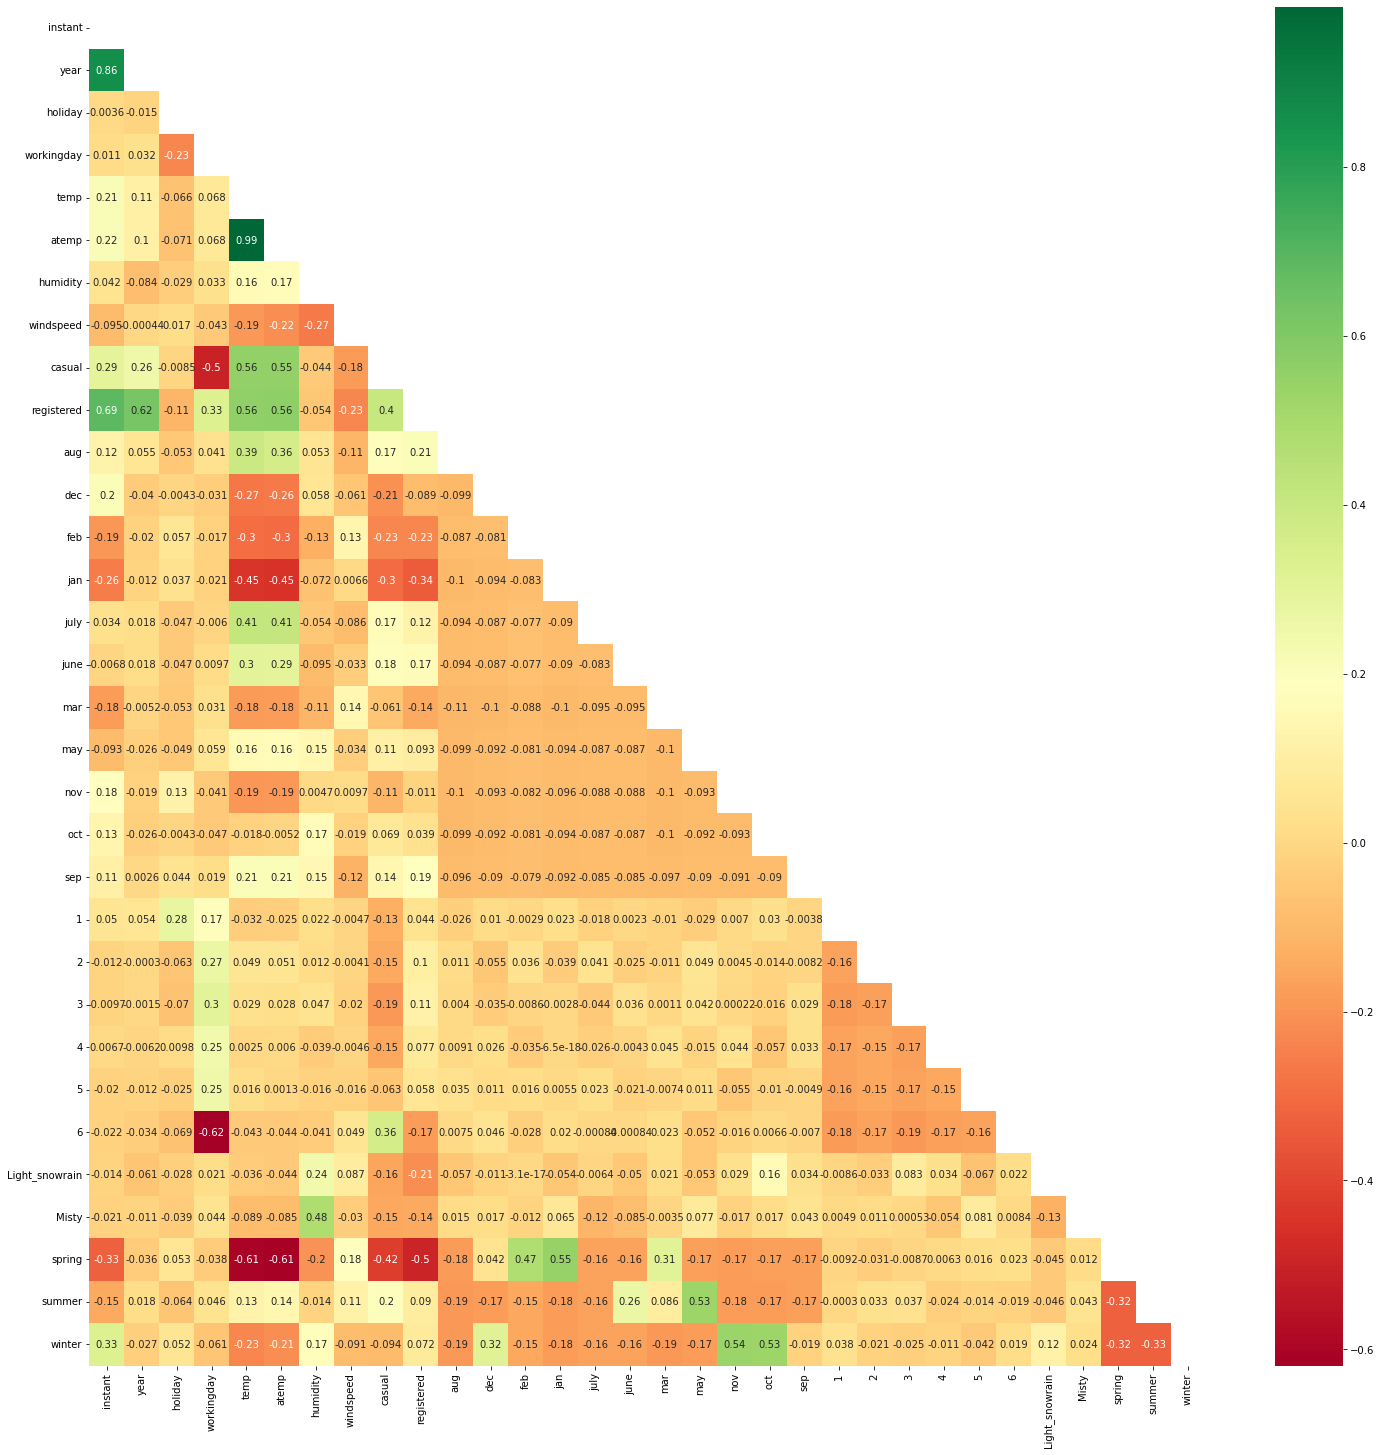

In [194]:
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

In [195]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'cnt'

<Figure size 432x432 with 0 Axes>

In [188]:
y_train = df_train.pop('cnt')
X_train = df_train

KeyError: 'cnt'

In [187]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: '31-07-2019'

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [51]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [53]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [54]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [55]:
X_train_rfe = X_train[col]

In [56]:
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


## Building a linear model

In [57]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.22e-191
Time:                        18:21:11   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [58]:
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [59]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.60e-188
Time:                        18:21:34   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [62]:
X_train_new = X_train_new.drop(['sep'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.55
2,workingday,5.21
4,windspeed,4.68
10,spring,2.95
11,summer,2.09
0,year,2.08
7,sat,1.96
12,winter,1.90
5,jan,1.62
9,Misty,1.57


In [63]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.45e-185
Time:                        18:23:21   Log-Likelihood:                 500.40
No. Observations:                 510   AIC:                            -972.8
Df Residuals:                     496   BIC:                            -913.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2013      0.031      6.

In [64]:
X_train_new = X_train_new.drop(['jan'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.46
2,workingday,5.17
4,windspeed,4.65
9,spring,2.38
10,summer,2.08
0,year,2.07
6,sat,1.95
11,winter,1.90
8,Misty,1.56
5,july,1.46


In [65]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.99e-185
Time:                        18:24:37   Log-Likelihood:                 497.84
No. Observations:                 510   AIC:                            -969.7
Df Residuals:                     497   BIC:                            -914.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1849      0.031      6.

In [67]:
X_train_new = X_train_new.drop(['july'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,temp,5.53
2,workingday,5.17
4,windspeed,4.65
8,spring,2.34
0,year,2.07
5,sat,1.95
9,summer,1.89
10,winter,1.80
7,Misty,1.55
1,holiday,1.16


In [68]:
lr_4.params

const             0.184943
year              0.233437
holiday          -0.049819
workingday        0.046698
temp              0.489105
windspeed        -0.153944
july             -0.074428
sat               0.058687
Light_snowrain   -0.284213
Misty            -0.080008
spring           -0.091843
summer            0.022105
winter            0.063387
dtype: float64

## Residual Analysis of the train data and validation

In [70]:
X_train_lm_4

,const,year,holiday,workingday,temp,windspeed,july,sat,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,1,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,1,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,1,0,1,0
111,1.0,0,0,1,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0,0.248216,0.431816,0,1,0,1,0,0,1
79,1.0,0,0,1,0.462664,0.529881,0,0,0,1,0,1,0


In [71]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

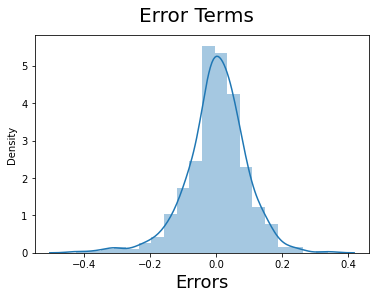

In [72]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [73]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,5.53
2,workingday,5.17
4,windspeed,4.65
8,spring,2.34
0,year,2.07
5,sat,1.95
9,summer,1.89
10,winter,1.80
7,Misty,1.55
1,holiday,1.16


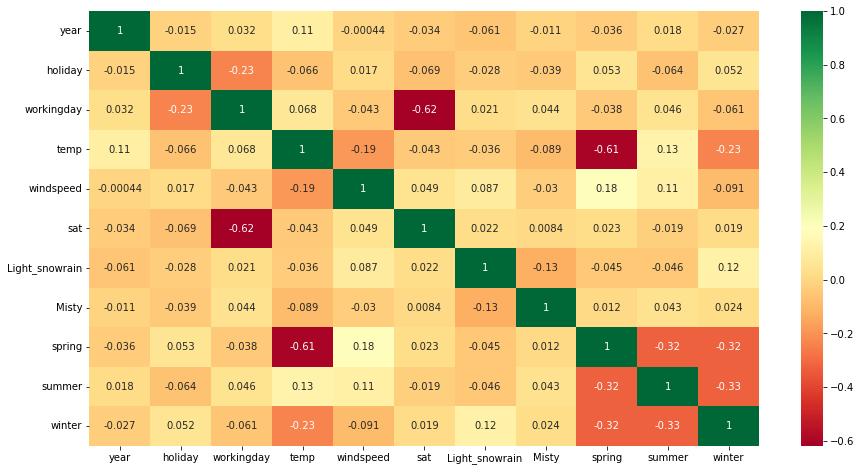

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

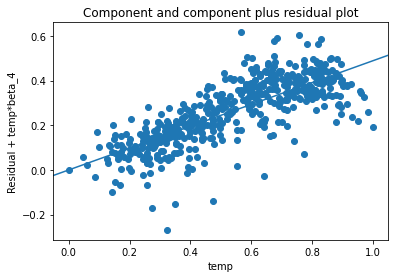

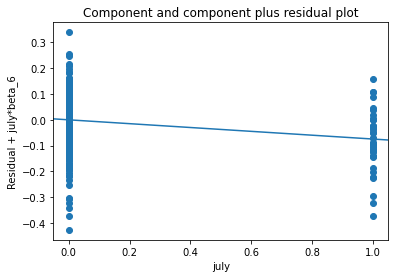

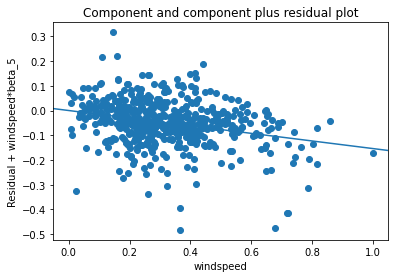

In [77]:
sm.graphics.plot_ccpr(lr_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'july')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

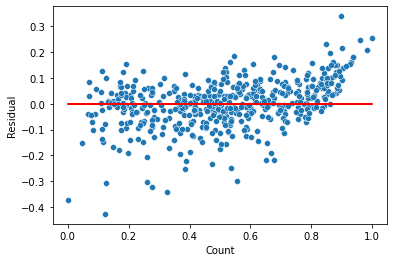

In [79]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Making Predictions Using the Final Model

In [80]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [189]:
df_test.head()

,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,1,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
184,185,04-07-2018,0,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,536,20-06-2019,1,0,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
299,300,27-10-2018,0,0,1,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,222,10-08-2018,0,0,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
152,153,02-06-2018,0,0,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [196]:
y_test = df_test.pop('cnt')
X_test = df_test

KeyError: 'cnt'

In [83]:
col1 = X_train_new.columns

X_test = X_test[col1]

X_test_lm_4 = sm.add_constant(X_test)

In [84]:
y_pred = lr_4.predict(X_test_lm_4)

ValueError: shapes (220,12) and (13,) not aligned: 12 (dim 1) != 13 (dim 0)